# Artificial neural Network using Keras with Tensorflow 2.1 as backend (tf.keras)

Dataset here used is Churn_Modelling downloaded from Kaaggle 

In [0]:
#!apt install unzip
#!pip install --upgrade tensorflow

In [2]:
#mounting google drive to google colab for accessing dataset

#No use now due to automatic mounting of google Drive
'''from google.colab import drive
drive.mount('/content/gdrive')'''

#Checking gdrive access
#!ls '/content/gdrive/My Drive'

#!unzip -q '/content/gdrive/My Drive/Colab Notebooks/churn-modelling.zip'

"from google.colab import drive\ndrive.mount('/content/gdrive')"

In [0]:
!unzip -q '/content/drive/My Drive/Colab Notebooks/churn-modelling.zip'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing dataset
dataset=pd.read_csv('Churn_Modelling.csv')
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [0]:
#1.Data Preprocessing
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

#Concatenate dataframes
X=pd.concat([X,geography,gender],axis=1)

#drop unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [0]:
#Splitting the dataset in training set and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


Here Sequential Model API is used which is quite easy to implement.
This is MLP that means it is a standard fully connected neural network model.
It is comprised of layers of nodes where each node is connected to all outputs from the previous layer and the output of each node is connected to all inputs for nodes in the next layer.There are three predictive modeling problems we can solve with an MLP.

*   Binary classification
*   Multiclass classification
*   Regression

In [7]:
#2. Creating ANN
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
#Creating ANN

#importing keras libraries and functional packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU,PReLU,ELU,Dropout

TensorFlow 2.x selected.
2.1.0


In [22]:
#Initializing ANN
classifier=Sequential()

#Adding the input layer and the first hidden layer with 16 neurons
classifier.add(Dense(units=16,kernel_initializer='he_uniform',activation='relu',input_dim=11))
#Adding the second hidden layer with 6 neurons
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
#Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

#Compiling ANN
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

#Fitting the ANN to training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

#list all data in history
print(model_history.history.keys())

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 420us/sample - loss: 0.6005 - accuracy: 0.7285 - val_loss: 0.4628 - val_accuracy: 0.8016
Epoch 2/100
5359/5359 [==============================] - 2s 357us/sample - loss: 0.4292 - accuracy: 0.8196 - val_loss: 0.4253 - val_accuracy: 0.8175
Epoch 3/100
5359/5359 [==============================] - 2s 360us/sample - loss: 0.4005 - accuracy: 0.8339 - val_loss: 0.4102 - val_accuracy: 0.8258
Epoch 4/100
5359/5359 [==============================] - 2s 356us/sample - loss: 0.3822 - accuracy: 0.8444 - val_loss: 0.3982 - val_accuracy: 0.8311
Epoch 5/100
5359/5359 [==============================] - 2s 361us/sample - loss: 0.3673 - accuracy: 0.8520 - val_loss: 0.3926 - val_accuracy: 0.8338
Epoch 6/100
5359/5359 [==============================] - 2s 370us/sample - loss: 0.3568 - accuracy: 0.8550 - val_loss: 0.3829 - val_accuracy: 0.8372
Epoch 7/100
5359/5359 [==============================] - 2

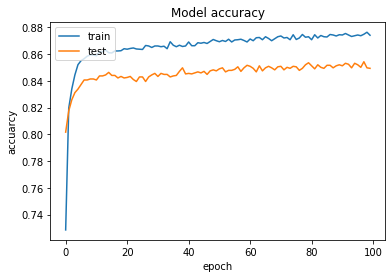

In [23]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuarcy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

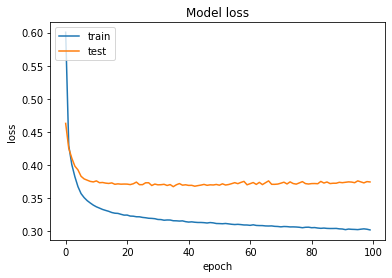

In [24]:
#Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [25]:
#3. Making the predictions and evaluation of model

#predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

#Calculate the accuarcy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

print(score)

[[1506   89]
 [ 195  210]]
0.858
